# Linear Systems

In this lesson I'll introduce the basics of linear algebra by talking about linear systems of equations and the matrix-vector notation. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *

## Linear Functions

We've already seen scalar linear functions, which have the form $y = ax$. Linear functions, like the name suggests, represent lines in the plane. Since $y=0$ if $x=0$, those lines must always pass through the origin.

The coefficient $a$ is called the **slope** of the function. It determines the steepness of the line and whether the line slants to the left or to the right. The slope also represents the derivative of the function, since

$$\frac{dy}{dx} = a.$$

The fact that the derivative is the slope tells us something about what $a$ means practically speaking. It's the amount that $y$ changes in response to changes in $x$. If we increase $x$ by one unit, then $y$ changes by $a$ units. In this sense, you can also think of $a$ as a *weight* or a *gain* that tells how much $x$ influences $y$. 

For example, suppose you're on a road trip, say from San Francisco to Los Angeles. You look at your speedometer and reason that you're averaging a speed of about $a=60$ miles per hour. If you've already driven for $x=5$ hours and covered a distance of $y=300$ miles, how much more distance will you cover if you drive for $dx=1$ more hour? Clearly it's $a=60$ miles, which will bring your distance traveled to $y+dy=360$ miles. That's all the slope is saying.

The above example corresponds to the linear equation $y=60x$. Here's a plot of what this looks like. Nothing special, just a line with slope $60$.

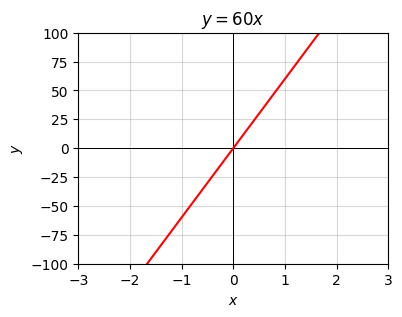

In [2]:
#| fig-align: center
a = 60
x = np.linspace(-3, 3, 100)
f = lambda x: a * x
plot_function(x, f, xlim=(-3, 3), ylim=(-100, 100), title=f'$y={a}x$')

If there are two inputs $x_0$ and $x_1$, a linear function would look like

$$y = a_0 x_0 + a_1 x_1.$$

This defines a *plane* in 3-dimensional space that passes through the origin. Each coefficient again tells you something about how the output changes if that input is changed. If $x_0$ is changed by one unit, holding $x_1$ fixed, then $y$ changes by $a_0$ units. Similarly, if $x_1$ is changed by one unit, holding $x_0$ fixed, then $y$ changes by $a_1$ units.

Here's an example. Take $y = 5x_0 - 2x_1$. It will look like the plane shown below. Changing $x_0$ by one unit while holding $x_1$ fixed will cause $y$ to *increase* by $5$ units. Changing $x_1$ by one unit while holding $x_0$ fixed will cause $y$ to *decrease* by $2$ units.

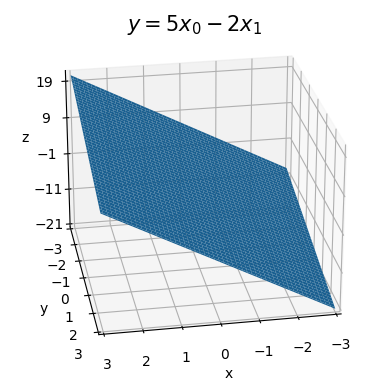

In [3]:
#| fig-align: center
a0, a1 = 5, -2
x0 = np.linspace(-3, 3, 100)
x1 = np.linspace(-3, 3, 100)
f = lambda x0, x1: a0 * x0 + a1 * x1
plot_function_3d(x0, x1, f, azim=80, elev=25, ticks_every=[1, 1, 10],
                 titlepad=6, labelpad=3, title=f'$y=5x_0 - 2x_1$')

This idea readily extends to $n$ variables too, though you can't visualize it anymore. If there are $n$ variables $x_0, x_1, \cdots, x_{n-1}$, a linear function has the form

$$y = a_0 x_0 + a_1 x_1 + \cdots a_{n-1} x_{n-1}.$$

This equation now defines a *hyperplane* in $n$-dimensional space that passes through the origin. Each coefficient $a_i$ represents how much $y$ changes if $x_i$ is increased by one unit, while holding all the other $x_j$ fixed.

We can also think about *systems* of linear equations. For example, we can have 2 outputs $y_0, y_1$, each of which is its own linear function of 3 input variables $x_0, x_1, x_2$. It might look like this

\begin{alignat*}{5}
y_0 & {}={}   a_{0,0} x_0 & {}+{} &  a_{0,1} x_1 & {}+{} & a_{0,2} x_2 \\
y_1 & {}={}   a_{1,0} x_0 & {}+{} &  a_{1,1} x_1 & {}+{} & a_{1,2} x_2. \\
\end{alignat*}

The most general situation we'll consider is a system of $m$ linear equations with $n$ inputs,

$$
\begin{array}{c<{x_0} c c<{x_1} c c<{\cdots} c c<{x_{n-1}} c l}
y_0 & = & a_{0,0}x_0 & + & a_{0,1}x_1 & + & \cdots & + & a_{0,n-1}x_{n-1} \\
y_1 & = & a_{1,0}x_0 & + & a_{1,1}x_1 & + & \cdots & + & a_{1,n-1}x_{n-1} \\
\vdots & & \vdots    &   & \vdots    &   &  \ddots  &   & \quad \vdots\\
y_{m-1} & = & a_{m-1,0}x_0 & + & a_{m-1,1}x_1 & + & \cdots & + & a_{m-1,n-1}x_{n-1}. \\
\end{array}
$$

This kind of linear system is often called an $m \times n$ linear system, or a system of $m$ linear equations with $n$ unknowns. There are $m \cdot n$ coefficients in this system, namely $a_{0,0}, \cdots, a_{m-1,n-1}$. Each $a_{i,j}$ would tell you how much the output $y_i$ would change if the input $x_j$ was increased by one unit. Visually, you can think of an $m \times n$ linear system as corresponding to a set of $m$ $n$-dimensional hyperplanes.

## Matrix-Vector Notation

Linear systems of equations are incredibly cumbersome to work with in all but the simplest cases of like 2 or 3 equations. There's a much cleaner notation for working with these linear systems. Here's what we can do. Notice we seem to have three separate types of objects showing up in these equations:

- The $m$ output variables $y_0, y_1, \cdots, y_{m-1}$.
- The $m \cdot n$ coefficients $a_{0,0}, \ a_{0,1}, \ \cdots, \ a_{m-1,n-1}$.
- The $n$ input variables $x_0, x_1, \cdots, x_{n-1}$.

Let's put each of these sets into their own array, and *define* an $m \times n$ linear system of equations to mean the same thing as the following expression,

$$
\begin{pmatrix}
y_0 \\ y_1 \\ \vdots \\ y_{m-1}
\end{pmatrix} = 
\begin{pmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n-1} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n-1} \\
\vdots  & \vdots  & \ddots & \vdots    \\
a_{m-1,0} & a_{m-1,1} & \cdots & a_{m-1,n-1}
\end{pmatrix}
\begin{pmatrix}
x_0 \\ x_1 \\ \vdots \\ x_{n-1}
\end{pmatrix}.
$$

Each of these arrays is a 2-dimensional array. The left-most array is a shape $(m, 1)$ array of outputs, and the right-most array is a shape $(n, 1)$ array of inputs. These are both called **column vectors**, or when we're being sufficiently lazy just **vectors**. Even though they're not *technically* 1-dimensional arrays, and hence not technically vectors, they're close enough that they might as well be. They're *isomorphic* to vectors. The middle array is a shape $(m, n)$ array of coefficients. We'll call this array an $m \times n$ **matrix**. 

Here's a couple of examples of going back and forth between equation notation and matrix-vector notation so you get the idea. It's good to be able to do this kind of thing without thinking. I'll frequently go back and forth from now on depending on which notation is most convenient.

\begin{gather*}
\begin{alignedat}{3}
   y_0 & {}={} & 3x_0 & {}+{} &  x_1  \\
   y_1 & {}={} & x_0 & {}-{} &  2x_1
\end{alignedat}
\quad \Longleftrightarrow \quad
\begin{pmatrix}
y_0 \\
y_1
\end{pmatrix} = 
\begin{pmatrix}
3 & 1 \\
1 & -2
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1
\end{pmatrix},
\end{gather*}

\begin{gather*}
\begin{alignedat}{5}
   y_0 & {}={} & x_0 & {}+{} &  2x_1 & {}+{} & 3x_2  \\
   y_1 & {}={} & 4x_0 & {}-{} &  5x_1 & {} {} & 
\end{alignedat}
\quad \Longleftrightarrow \quad
\begin{pmatrix}
y_0 \\
y_1 \\
\end{pmatrix} = 
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 0
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1 \\
x_2
\end{pmatrix}.
\end{gather*}

It's convenient to use an abstract notation to express vectors and matrices so we can more easily manipulate them. If we define the symbol $\mathbf{x}$ to represent the column vector of inputs, the symbol $\mathbf{y}$ to represent the column vector of outputs, and the symbol $\mathbf{A}$ to represent the matrix of coefficients, we can write the same $m \times n$ linear system in the much simpler form

$$\mathbf{y} = \mathbf{A} \mathbf{x}.$$

This looks almost just like the simple one-dimensional linear equation $y=ax$, except it's packing a lot more into it that we'll have to analyze. By convention, I'll use bold-face characters to represent vectors and matrices (and tensors) in this book. For this most part, I'll try to use lower-case letters for vectors, and upper-case letters for matrices. This is an almost universally followed convention, but it's not unanimous.

To index into these arrays, I'll mostly use subscript notation. For example, the element of $\mathbf{x}$ at index $i$ will be denoted $x_i$. The element of $\mathbf{A}$ at index $(i,j)$ will be denoted $A_{i,j}$. Sometimes I'll also use the code equivalent of $x[i]$ or $A[i,j]$ when it's more clear. Following the python convention, I'll always index starting from $0$, so that an array of $n$ elements goes from $0, 1, \cdots, n-1$, *not* from $1, 2, \cdots, n$ as is more typical in math books. I do this mainly to make going between math and code easier, as index errors can be a pain to deal with.

It may not be at all obvious, but having written a linear system as a matrix-vector equation, I've implicitly defined a new kind of array multiplication. To see this, I'll define a new column vector that I'll call $\mathbf{A} \mathbf{x}$ whose elements are just the right-hand side of the linear system when written out,

$$
\mathbf{A} \mathbf{x} = 
\begin{pmatrix}
a_{0,0}x_0 & + & a_{0,1}x_1 & + & \cdots & + & a_{0,n-1}x_{n-1} \\
a_{1,0}x_0 & + & a_{1,1}x_1 & + & \cdots & + & a_{1,n-1}x_{n-1} \\
\vdots    &   & \vdots    &   &  \ddots  &   & \quad \vdots     \\
a_{m-1,0}x_0 & + & a_{m-1,1}x_1 & + & \cdots & + & a_{m-1,n-1}x_{n-1} \\
\end{pmatrix}.
$$

Setting the $i$<sup>th</sup> row of $\mathbf{A} \mathbf{x}$ equal to the $i$<sup>th</sup> row of $\mathbf{y}$ must imply that each element $y_i$ can be written

$$y_i = a_{i,0}x_0 + a_{i,1}x_1 + \cdots + a_{i,n-1}x_{n-1} = \sum_{k=0}^{n-1} a_{i,k}x_k.$$

That is, each constant term $y_i$ is the sum of the products of the $i$<sup>th</sup> row of the matrix $\mathbf{A}$ with the vector $\mathbf{x}$. This is **matrix-vector multiplication**, a special case of matrix multiplication, which I'll get to shortly. Note that this operation is only defined when the number columns of $\mathbf{A}$ matches the size of $\mathbf{x}$. We say in this case that $\mathbf{A}$ and $\mathbf{x}$ are **compatible**.

Here's a quick example, where a $2 \times 3$ matrix $\mathbf{A}$ is matrix multiplied with a size $3$ vector $\mathbf{x}$. For each row we're element-wise multiplying that row of $\mathbf{A}$ with the vector $\mathbf{x}$ and then summing up the terms. The output will be the vector $\mathbf{y}$ of size $2$.

$$
\mathbf{A} \mathbf{x} = 
\begin{pmatrix}
\color{red}{1} & \color{red}{2} & \color{red}{3} \\
\color{blue}{4} & \color{blue}{5} & \color{blue}{6}
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = 
\begin{pmatrix}
\color{red}{1} \color{black}{\cdot} \color{black}{1} \color{black}{+} \color{red}{2} \color{black}{\cdot} \color{black}{1} \color{black}{+} \color{red}{3} \color{black}{\cdot} \color{black}{1} \\
\color{blue}{4} \color{black}{\cdot} \color{black}{1} \color{black}{+} \color{blue}{5} \color{black}{\cdot} \color{black}{1} \color{black}{+} \color{blue}{6} \color{black}{\cdot} \color{black}{1} \\
\end{pmatrix} = 
\begin{pmatrix}
6 \\
15
\end{pmatrix} = \mathbf{y}.
$$

I used the color coding to help illustrate a point. Notice that each element of $\mathbf{y}$ is just that row of $\mathbf{A}$ being element-wise multiplied by $\mathbf{x}$ and summed over. The fancy term for this operation is a *dot product*. I'll get into that more in the next lesson.

## Matrix Multiplication

Matrix-vector multiplication is just a special case of the more general matrix multiplication. If $\mathbf{A}$ is an $m \times n$ matrix and $\mathbf{B}$ is an $n \times p$ matrix, we'll define their **matrix multiplication** as a new $m \times p$ matrix $\mathbf{C}$ whose elements are given by

$$C_{i,j} = \sum_{k=0}^{n-1} A_{i,k} B_{k,j} = A_{i,0} B_{0,j} + A_{i,1} B_{1,j} + \cdots + A_{i,n-1} B_{n-1,j}.$$

Matrix multiplication is always expressed symbolically by directly concatenating the two matrix symbols next to each other like $\mathbf{A}\mathbf{B}$. We'd never use a multiplication symbol between them since those are often used to represent other kinds of multiplication schemes like element-wise multiplication or convolutions. Further, matrix multiplication is only defined when the numbers of *columns* in $\mathbf{A}$ equals the number of *rows* of $\mathbf{B}$. We say matrices satisfying this condition are **compatible**. If they can't be multiplied, they're called **incompatible**.

In words, matrix multiplication is the process where you take a *row* $i$ of the left matrix $\mathbf{A}$, element-wise multiply it with a *column* $j$ of the right matrix $\mathbf{B}$, and then sum up the results to get the entry $C_{i,j}$ of the output matrix $\mathbf{C}$. Doing this for all pairs of rows and columns will fill in $\mathbf{C}$.

Here's an example where $\mathbf{A}$ is $3 \times 3$ and $\mathbf{B}$ is $3 \times 2$. The output matrix $\mathbf{C}$ will be $3 \times 2$.

$$
\begin{pmatrix}
    \color{red}{1} & \color{red}{2} & \color{red}{3} \\
    \color{blue}{4} & \color{blue}{5} & \color{blue}{6} \\
    \color{green}{7} & \color{green}{8} & \color{green}{9} \\
\end{pmatrix}
\begin{pmatrix}
    \color{orange}{6} & \color{purple}{5} \\
    \color{orange}{4} & \color{purple}{3} \\
    \color{orange}{2} & \color{purple}{1} \\
\end{pmatrix} = 
\begin{pmatrix}
   \color{red}{1} \color{black}{\cdot} \color{orange}{6} \color{black}{+} \color{red}{2} \color{black}{\cdot} \color{orange}{4} \color{black}{+} \color{red}{3} \color{black}{\cdot} \color{orange}{2} & \color{red}{1} \color{black}{\cdot} \color{purple}{5} \color{black}{+} \color{red}{2} \color{black}{\cdot} \color{purple}{3} \color{black}{+} \color{red}{3} \color{black}{\cdot} \color{purple}{1} \\
   \color{blue}{4} \color{black}{\cdot} \color{orange}{6} \color{black}{+} \color{blue}{5} \color{black}{\cdot} \color{orange}{4} \color{black}{+} \color{blue}{6} \color{black}{\cdot} \color{orange}{2} & \color{blue}{4} \color{black}{\cdot} \color{purple}{5} \color{black}{+} \color{blue}{5} \color{black}{\cdot} \color{purple}{3} \color{black}{+} \color{blue}{6} \color{black}{\cdot} \color{purple}{1} \\
   \color{green}{7} \color{black}{\cdot} \color{orange}{6} \color{black}{+} \color{green}{8} \color{black}{\cdot} \color{orange}{4} \color{black}{+} \color{green}{9} \color{black}{\cdot} \color{orange}{2} & \color{green}{7} \color{black}{\cdot} \color{purple}{5} \color{black}{+} \color{green}{8} \color{black}{\cdot} \color{purple}{3} \color{black}{+} \color{green}{9} \color{black}{\cdot} \color{purple}{1} \\
\end{pmatrix} = 
\begin{pmatrix}
   20 & 14 \\
   56 & 41 \\
   92 & 68 \\
\end{pmatrix}.
$$

**Aside:** If you're still having a hard time picturing what matrix multiplication is doing, you may find [this](http://matrixmultiplication.xyz/) online visualization tool useful.

Note that matrix multiplication does not **commute**. That is, we can't swap the order of the two matrices being multiplied, $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$. Try to multiply the previous example in the opposite order and see what happens. The matrices won't even be compatible anymore. 

However, matrix multiplication is **associative**, which means you can group parentheses just like you ordinarily would. For example, multiplying three matrices $\mathbf{A}, \mathbf{B}, \mathbf{C}$ could be done by multiplying either the first two, and then the last; or the last two, and then the first. That is,

$$\mathbf{A}\mathbf{B}\mathbf{C} = \mathbf{A}(\mathbf{B}\mathbf{C}) = (\mathbf{A}\mathbf{B})\mathbf{C}.$$

### Matrix Multiplication Algorithm

Matrix multiplication is perhaps the single most important mathematical operation in machine learning. It's so important I'm going to write a function to code it from scratch before showing how to do it in numpy. I'll also analyze the speed of the algorithm in FLOPS and the memory in terms of word size. Algorithmically, all matrix multiplication is doing is looping over every single element of $\mathbf{C}$ and performing the sum-product calculation above for each $C_{i,j}$. I'll define a function called `matmul` that takes in two numpy arrays `A` and `B` and multiplies them, returning the product `C` if the dimensions are compatible.

In [4]:
def matmul(A, B):
    assert A.shape[1] == B.shape[0]
    m, n, p = A.shape[0], A.shape[1], B.shape[1]
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); print(f'A = \n{A}')
B = np.array([[6, 5], [4, 3], [2, 1]]); print(f'B = \n{B}')
C = matmul(A, B); print(f'C = AB = \n{C.astype(A.dtype)}')

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B = 
[[6 5]
 [4 3]
 [2 1]]
C = AB = 
[[20 14]
 [56 41]
 [92 68]]





Let's take a quick look at what this function is doing complexity wise. First off, we're pre-computing the output matrix $\mathbf{C}$. That'll contribute $O(mp)$ memory since $\mathbf{C}$ is $m \times p$. All of the FLOPS are happening inside the double loop over $m$ and $p$. For each $i,j$ pair, the function is doing $n$ total multiplications and $n-1$ total additions, which means there's $2n-1$ FLOPs per $i,j$ pair. Since we're doing this operation $m \cdot p$ times, we're thus doing $m \cdot p \cdot (2n-1)$ total FLOPS in the matrix multiply. This gives us an $O(nmp)$ algorithm in general. Matrix multiplication is an example of a *cubic time* algorithm since if $n=m=p$ we'd have a $O(n^3)$ FLOPS operation.

**Aside:** People have found algorithms that can matrix multiply somewhat faster than cubic time. For example, [Strassen's algorithm](https://en.wikipedia.org/wiki/Strassen_algorithm) can matrix multiply in about $O(n^{2.8})$ time. In practice, though, these algorithms tend to have large constants out front, which means they're not that useful unless $n$ is *huge*. If the matrices have special structure, e.g. banded matrices or sparse matrices, they have special algorithms that can multiply them even faster, for example by using the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform), which can matrix multiply as fast as $O(n^2 \log^2 n)$. This is what, for example, convolutional neural networks use.

Cubic time may seem fast since it's polynomial time, but it's really not that great unless the matrices are relatively small (say $n \leq 1000$ or so). For this reason, a lot of effort has instead gone into pushing down the algorithmic constant out front, e.g. by doing special hardware optimizations like SIMD, optimizing matrix blocks to take advantage of memory efficiency, or heavily parallelizing the operation by doing the inner loops in parallel. It's also a good idea to push operations down to low-level compiled code written in FORTRAN or C, which is what numpy essentially does.

In the age of deep learning we're finding ourselves needing to multiply a lot of matrices and needing to do it quickly. This has been enabled largely through the use of GPUs to do array computations. GPUs are essentially specially built hardware just to do array operations like matrix multiplication efficiently. It's no exaggeration in fact to say that the recent deep learning revolution happened precisely because of GPUs.

Anyway, we'd never want to implement matrix multiplication natively in python like this. It's far too most of the time. In practice we'd use something like `np.matmul(A, B)`. Numpy also supports a cleaner syntax using the `@` operator. This means we can also express the matrix multiply as `A @ B`, which means exactly the same thing as `np.matmul(A, B)`, just with cleaner syntax. This syntax is what I'll typically use in this book. 

Here's an example. I'll multiply the same two matrices from before, but this time using numpy. To show it's faster than native python matmul, I'll run a quick profiler as well. You can see that even with these small matrices we're still getting a 10x speedup using numpy over base python. The speedup can get up to 100x and higher for much larger matrices.

In [6]:
C = A @ B
print(f'C = \n{C.astype(A.dtype)}')

C = 
[[20 14]
 [56 41]
 [92 68]]


In [7]:
%timeit matmul(A, B)

11.2 µs ± 14 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
%timeit A @ B

892 ns ± 4.44 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Chained Matrix Multiplication

What if we'd like to multiply three or more matrices together. I already said matrix multiplication is associative, so *in theory* we should be able to matrix multiply in any order and get the same answer. However, there are often computational advantages to multiplying them together in some particular sequence. For example, suppose we wanted to multiply $\mathbf{D} = \mathbf{A}\mathbf{B}\mathbf{C}$. Suppose, $\mathbf{A}$ is $m \times n$, $\mathbf{B}$ is $n \times p$, and $\mathbf{C}$ is $p \times q$. No matter which order we do it, the output $\mathbf{D}$ will have size $m \times q$. But there are two ways we could do this multiplication.

1. $\mathbf{D} = \mathbf{A}(\mathbf{B}\mathbf{C})$: In this case, the $\mathbf{E}=\mathbf{B}\mathbf{C}$ computation requires $nq(2p-1)$ FLOPS, and then the $\mathbf{A}\mathbf{E}$ computation requires $mq(2n-1)$ FLOPS. The total is thus the sum of these two, i.e.
$$nq(2p-1) + mq(2n-1) = O(npq+mnq) \ \ \text{FLOPS}.$$

2. $\mathbf{D} = (\mathbf{A}\mathbf{B})\mathbf{C}$: In this case, the $\mathbf{F}=\mathbf{A}\mathbf{B}$ computation requires $mp(2n-1)$ FLOPS, and then the $\mathbf{F}\mathbf{C}$ computation requires $mq(2n-1)$ FLOPS. The total is thus the sum of these two, i.e.
$$mq(2p-1) + mp(2n-1) = O(mpq+mnp) \ \ \text{FLOPS}.$$

Let's put some numbers in to make it clear what's going on. Suppose $m=1000$, $n=2$, $p=100$, and $q=100$. Then the first case takes

$$nq(2p-1) + mq(2n-1) = 339800 \ \ \text{FLOPS},$$

while the second case takes a staggering

$$mq(2p-1) + mp(2n-1) = 20200000 \ \ \text{FLOPS}.$$

It would thus behoove us in this case to multiply the matrices in the first order to save on computation, $\mathbf{D} = \mathbf{A}(\mathbf{B}\mathbf{C})$. Here's a programmatic way to see this.

In [9]:
m = 1000
n = 2
p = 100
q = 100

print(f'A(BC): {m * q * (2 * n - 1) + n * q * (2 * p - 1)} FLOPS')
print(f'(AB)C: {m * p * (2 * n - 1) + m * q * (2 * p - 1)} FLOPS')

A(BC): 339800 FLOPS
(AB)C: 20200000 FLOPS


The same issues extend to multiplying together arbitrarily many matrices. You can save *a lot* of compute by first taking time to find the optimal order to multiply them together before doing the computation. Don't just naively multiply them in order. Numpy has a function `np.linalg.multi_dot` that can do this for you. If you pass in a list of matrices, it'll multiply them together in the most efficient order to help save on computation. Here's an example. I'll profile the different ways we can do the $\mathbf{A}\mathbf{B}\mathbf{C}$ example above. Notice that indeed $\mathbf{A}(\mathbf{B}\mathbf{C})$ is much faster than $(\mathbf{A}\mathbf{B})\mathbf{C}$. The `multi_dot` solution is roughly as fast as the $\mathbf{A}(\mathbf{B}\mathbf{C})$ solution, but it does take slightly longer because it first calculates the optimal ordering, which adds a little bit of time.

In [10]:
A = np.random.rand(m, n)
B = np.random.rand(n, p)
C = np.random.rand(p, q)

In [11]:
%timeit A @ (B @ C)

64.8 µs ± 37.2 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%timeit (A @ B) @ C

526 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
%timeit np.linalg.multi_dot([A, B, C])

78.2 µs ± 223 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Matrix Multiplication vs Element-Wise Multiplication

We've already seen a different way we can multiply two matrices (or any array), namely element-wise multiplication. For matrices, element-wise multiplication is sometimes called the **Hadamard product**. I'll denote element-wise multiplication as $\mathbf{A} \circ \mathbf{B}$. Note that element-wise multiplication is only defined when the shapes of $\mathbf{A}$ and $\mathbf{B}$ are *exactly equal* (or can be broadcasted to be equal).

It's important to mind the difference between matrix multiplication and element-wise multiplication of matrices. In general $\mathbf{A} \circ \mathbf{B} \neq \mathbf{A} \mathbf{B}$. They're defined completely differently,

\begin{align*}
(A \circ B)_{i,j} &= A_{i,j} \cdot B_{i,j} \\
(AB)_{i,j} &= \sum_k A_{i,k}B_{k,j}.
\end{align*}

In numpy use `A * B` for element-wise multiplication and `A @ B` for matrix multiplication. To make it clear the two kinds of multiplication aren't the same thing here's an example.

In [14]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 0], [0, 1]])
print(f'A*B = \n{A * B}')
print(f'AB = \n{A @ B}')

A*B = 
[[1 0]
 [0 4]]
AB = 
[[1 2]
 [3 4]]


### Interpreting Matrix Multiplication

This stuff might seem kind of abstract so far. Why should we care about multiplying matrices? I'll say more about that in the next lesson, but for now I want to mention a useful way to interpret matrix-vector multiplication and matrix multiplication, a way that you almost certainly never learned in school when you were taught about matrices.

We can think about a matrix in a few different ways. One way is just as a 2-dimensional array of numbers. We can also think of it as a stack of vectors. If $\mathbf{A}$ is an $m \times n$, we can think of each *column* of $\mathbf{A}$ as being a vector of size $m \times 1$. These are called the **column vectors** of $\mathbf{A}$. We can also think about each *row* of $\mathbf{A}$ as being a vector of size $1 \times n$. These are called the **row vectors** of $\mathbf{A}$. In keeping with the python convention, I'll denote the column vectors of $\mathbf{A}$ by $\mathbf{A}_{:, i}$, and the row vectors of $\mathbf{A}$ by $\mathbf{A}_{i, :}$. Notice the use of the slice operator $:$ here, which means "take everything in that dimension".

Here's an example. Take $\mathbf{A}$ to be the following $2 \times 3$ matrix,

$$
\mathbf{A} = 
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}.
$$

The *column* vectors of $\mathbf{A}$ are just

$$\mathbf{A}_{:, 0} = \begin{pmatrix} 1 \\ 4 \end{pmatrix}, \quad \mathbf{A}_{:, 1} = \begin{pmatrix} 2 \\ 5 \end{pmatrix}, \quad \mathbf{A}_{:, 2} = \begin{pmatrix} 3 \\ 6 \end{pmatrix},$$

And the *row* vectors of $\mathbf{A}$ are just

$$\mathbf{A}_{0, :} = \begin{pmatrix} 1 & 2 & 3 \end{pmatrix}, \quad \mathbf{A}_{1, :} = \begin{pmatrix} 4 & 5 & 6 \end{pmatrix}.$$

Using the column vectors of $\mathbf{A}$ we can think about the matrix multiplication $\mathbf{A} \mathbf{x}$ in an interesting way. If there are $n$ total column vectors, we can write

$$
\mathbf{A} \mathbf{x} = 
\begin{pmatrix}
\mathbf{A}_{:, 0} & \mathbf{A}_{:, 1} & \cdots & \mathbf{A}_{:, n-1}
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1 \\
\vdots \\
x_{n-1}
\end{pmatrix} = 
x_0 \mathbf{A}_{:, 0} + x_1 \mathbf{A}_{:, 1} + \cdots x_{n-1} \mathbf{A}_{:, n-1}.
$$

Evidently, we can think of $\mathbf{A} \mathbf{x}$ as some kind of mixture of the columns of $\mathbf{A}$, weighted by the elements of $\mathbf{x}$. Such a mixture is called a **linear combination**. In this terminology, we'd say that the matrix-vector multiplication $\mathbf{A} \mathbf{x}$ is a linear combination of the columns of $\mathbf{A}$.

For example, if $\mathbf{A}$ is the $2 \times 3$ matrix from the previous example and $\mathbf{x} = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}$, we'd have


$$
\mathbf{A} \mathbf{x} = 
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = 1 \cdot \binom{1}{4} + 1 \cdot \binom{2}{5} + 1 \cdot \binom{3}{6} = \binom{1+2+3}{4+5+6} = \binom{6}{15}.
$$

We can think of matrix multiplication in a similar way. Suppose we want to multiply two matrices $\mathbf{A} \mathbf{X}$. You can think of $\mathbf{X}$ as itself being a bunch of different column vectors $\mathbf{X}_{:, i}$, where for each of those column vectors we're doing a matrix-vector multiplication $\mathbf{A}\mathbf{X}_{:, i}$. That is, matrix multiplication is just a *batch* of weighted linear combinations of the columns of $\mathbf{A}$,

$$
\begin{array}{c<{x_0} c c<{x_1} c c<{\cdots} c c<{x_{n-1}} c l}
\mathbf{A} \mathbf{X}_{:, 0} & = & X_{0,0} \mathbf{A}_{:, 0} & + & X_{1,0} \mathbf{A}_{:, 1} & + & \cdots & + & X_{m-1,0} \mathbf{A}_{:, n-1} \\
\mathbf{A} \mathbf{X}_{:, 1} & = & X_{0,1} \mathbf{A}_{:, 0} & + & X_{1,1} \mathbf{A}_{:, 1} & + & \cdots & + & X_{m-1,1} \mathbf{A}_{:, n-1} \\
\vdots & & \vdots    &   & \vdots    &   &  \ddots  &   & \quad \vdots\\
\mathbf{A} \mathbf{X}_{:, n-1} & = & X_{0,n-1} \mathbf{A}_{:, 0} & + & X_{1,n-1} \mathbf{A}_{:, 1} & + & \cdots & + & X_{m-1,n-1} \mathbf{A}_{:, n-1}. \\
\end{array}
$$

These aren't the only ways to interpret what matrix multiplication is doing. I'll cover a more geometric interpretation later, where it'll turn out that matrix multiplication is the same thing as the composition of linear maps.

## Solving Linear Systems

One of the most important things we'd like to do with linear systems is solve for their inputs. Suppose we have a linear equation of the form $ax=b$ and we wanted to solve for $x$. It's clear in this case what we'd do. Provided $a \neq 0$, we'd divide both sides by $a$ to get

$$x = \frac{b}{a} = a^{-1} b.$$

We'd like to be able to do something like this for an $m \times n$ linear system $\mathbf{Ax} = \mathbf{b}$. But dividing by a matrix doesn't really make sense. We need to figure out another way to proceed. 

### Square Linear Systems

Perhaps it would help to recall how we'd solve a system of equations. Suppose for example we have the following system of 2 linear equations with 2 unknowns $x_0$ and $x_1$,

\begin{alignat*}{3}
   x_0 & {}+{} &  x_1 & {}={} & 2  \\
   x_0 & {}-{} &  x_1 & {}={} & 0. \\
\end{alignat*}

Using the method that pretty much always works, substitution, we can solve these one at a time. The second equation says $x_0 = x_1$. Plugging this into the first equation then says $x_0=x_1=1$, which is our solution. This is an example of the more general $2 \times 2$ linear system

\begin{alignat*}{3}
   ax_0 & {}+{} &  bx_1 & {}={} & e \\
   cx_0 & {}+{} &  dx_1 & {}={} & f.
\end{alignat*}

This can be solved by substitution too, but I'll spare you the details and use sympy to get the answer. It's given by

\begin{align*}
x_0 &= \frac{de-bf}{ad-bc} \\
x_1 &= \frac{af-ce}{ad-bc}.
\end{align*}

In [15]:
x0, x1 = sp.symbols('x_0 x_1')
a, b, c, d, e, f = sp.symbols('a b c d e f')
eq1 = sp.Eq(a * x0 + b * x1, e)
eq2 = sp.Eq(c * x0 + d * x1, f)
sol = sp.solve((eq1, eq2), (x0, x1))
print(f'x0 = {sol[x0]}')
print(f'x1 = {sol[x1]}')

x0 = (-b*f + d*e)/(a*d - b*c)
x1 = (a*f - c*e)/(a*d - b*c)


It's worth plotting what these equations look like to try to visualize what's going on. Let's look again at the specific set of equations

\begin{alignat*}{3}
   x_0 & {}+{} &  x_1 & {}={} & 2  \\
   x_0 & {}-{} &  x_1 & {}={} & 0. \\
\end{alignat*}

Each of these equations corresponds to a line in the plane, namely

$$y = 2 - x, \quad y = x.$$

If we plot these two lines, the point where they intersect is $(1,1)$, which is the solution to the linear system.

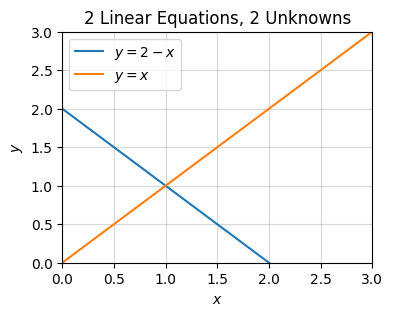

In [16]:
#| fig-align: center
x = np.linspace(-3, 3, 100)
f0 = lambda x: 2 - x
f1 = lambda x: x
plot_function(x, [f0, f1], xlim=(0, 3), ylim=(0, 3), title='2 Linear Equations, 2 Unknowns',
              labels=[f'$y=2-x$', f'$y=x$'])

More generally, the coefficients $a,b,c,d,e,f$ represent the slopes and intercepts of the two lines. Changing any of these will change the point of intersection, and hence also the solution to the $2 \times 2$ system. Notice there is one edge case, namely when $ad=bc$. This is when the two lines are parallel. Since parallel lines don't intersect, such a system would have no solution. You can also see this by noticing that the denominator for $x_0$ and $x_1$ blows up, since $D=ad-bc=0$. These denominators are special. They essentially say whether or not a solution to a given linear system will even exist.

Let's look now at the general $3 \times 3$ linear system

\begin{alignat*}{5}
   ax_0 & {}+{} &  bx_1 & {}+{} & cx_2 {}={} & j \\
   dx_0 & {}+{} &  ex_1 & {}+{} & fx_2 {}={} & k \\
   gx_0 & {}+{} &  hx_1 & {}+{} & ix_2 {}={} & l.
\end{alignat*}

According to sympy, the solution to this system is evidently this monstrosity,

\begin{align*}
x_0 &= \frac{bfl - bik - cel + chk + eij - fhj}{aei - afh - bdi + bfg + cdh - ceg} \\
x_1 &= \frac{-afl + aik + cdl - cgk - dij + fgj}{aei - afh - bdi + bfg + cdh - ceg} \\
x_2 &= \frac{ael - ahk - bdl + bgk + dhj - egj}{aei - afh - bdi + bfg + cdh - ceg}. \\
\end{align*}

In [17]:
x0, x1, x2 = sp.symbols('x_0 x_1 x_2')
a, b, c, d, e, f, g, h, i, j, k, l = sp.symbols('a b c d e f g h i j k l')
eq1 = sp.Eq(a * x0 + b * x1 + c * x2, j)
eq2 = sp.Eq(d * x0 + e * x1 + f * x2, k)
eq3 = sp.Eq(g * x0 + h * x1 + i * x2, l)
sol = sp.solve((eq1, eq2, eq3), (x0, x1, x2))
print(f'x0 = {sol[x0]}')
print(f'x1 = {sol[x1]}')
print(f'x2 = {sol[x2]}')

x0 = (b*f*l - b*i*k - c*e*l + c*h*k + e*i*j - f*h*j)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)
x1 = (-a*f*l + a*i*k + c*d*l - c*g*k - d*i*j + f*g*j)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)
x2 = (a*e*l - a*h*k - b*d*l + b*g*k + d*h*j - e*g*j)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)


Ignore the details of this thing. Just notice the fact that all three unknowns seem to again have the same denominator, in this case

$$D = aei - afh - bdi + bfg + cdh - ceg.$$

If $D=0$, the $3 \times 3$ system will have no solution. I can keep going, next to $4 \times 4$ systems, then $5 \times 5$ systems, but hopefully you get the point. There will always be a common denominator $D$ in the solutions that can't be zero. These denominators have a name. They're called **determinants**. If $\mathbf{A}$ is the $n \times n$ matrix of coefficients, we'll denote its determinant by $\det(\mathbf{A})$ or sometimes just by $|\mathbf{A}|$. We've thus stumbled on a general fact.

**Fact:** An $n \times n$ system of linear equations $\mathbf{Ax}=\mathbf{b}$ where $\mathbf{b} \neq \mathbf{0}$ has a solution if and only if $\det(\mathbf{A}) \neq 0$. In fact, this solution is *unique*.

Note there's an edge case when $\mathbf{b} = \mathbf{0}$ and $\det(\mathbf{A}) \neq 0$. In that one case, there will be infinitely many solutions. You can think of this as the situation where the solutions have a $\frac{0}{0}$, which is the one case where dividing by $0$ could still give a finite number.

Before moving on, let's visualize what the $3 \times 3$ linear system looks like. Consider the following specific example,

\begin{alignat*}{5}
   3x_0 & {}+{} &  2x_1 & {}+{} & x_2 {}={} & 0 \\
   x_0 & {}+{} &  x_1 & {}-{} & x_2 {}={} & 1 \\
   x_0 & {}-{} &  3x_1 & {}-{} & x_3 {}={} & -3. \\
\end{alignat*}

Again using substitution, you can solve each equation one by one to check that this system has a solution at $x_0=-\frac{1}{2}$, $x_1=1$, and $x_2=-\frac{1}{2}$. The three equations above form a set of three planes given by

\begin{align*}
z &= -3x - 2y + 0, \\
z &= x + y - 1, \\
z &= 4 . \\
\end{align*}

The solution to this $3 \times 3$ system will be the point where all three of these planes intersect. It's a perhaps a little hard to see in the plot, but hopefully you get the point. In general, the solution of an $n \times n$ linear system will occur at the point where the set of $n$ hyperplanes all intersect. If any two of the hyperplanes are parallel, the determinant will be zero, and there won't be a solution.

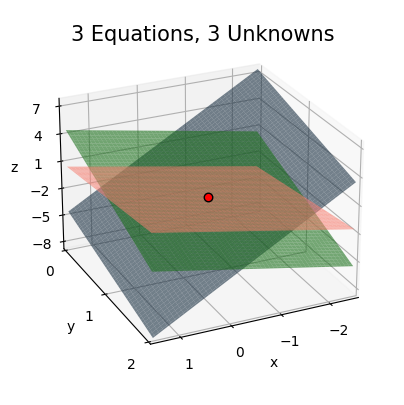

In [18]:
#| fig-align: center
x = np.linspace(-2.5, 1.5, 100)
y = np.linspace(0, 2, 100)
f1 = lambda x, y: -3 * x - 2 * y + 0
f2 = lambda x, y: x + y - 1
f3 = lambda x, y: x - 3 * y + 3
plot_function_3d(x, y, [f1, f2, f3], azim=65, elev=25, ticks_every=[1, 1, 3], figsize=(5, 5), zorders=[0, 2, 1],
                 colors=['steelblue', 'salmon', 'limegreen'], points=[[-0.5, 1, -0.5]], alpha=0.6, labelpad=3, 
                 dist=11, title='3 Equations, 3 Unknowns')

Let's now try to see if we can figure out a pattern, a way to systematically solve these linear systems. Let's start by going back to the easy $2 \times 2$ case. Recall that the linear system

\begin{alignat*}{3}
   ax_0 & {}+{} &  bx_1 & {}={} & e \\
   cx_0 & {}+{} &  dx_1 & {}={} & f. \\
\end{alignat*}

has solutions given by

\begin{align*}
x_0 &= \frac{de-bf}{ad-bc} \\
x_1 &= \frac{af-ce}{ad-bc}. \\
\end{align*}

Now, if we write this $2 \times 2$ linear system in matrix-vector notation, we'd have

$$
\mathbf{A}\mathbf{x} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1
\end{pmatrix} =
\begin{pmatrix}
e \\
f
\end{pmatrix}
= \mathbf{b},
$$

and the solutions would look like

$$
\mathbf{x} = 
\begin{pmatrix}
x_0 \\
x_1
\end{pmatrix} =
\begin{pmatrix}
\frac{de-bf}{ad-bc} \\
\frac{af-ce}{ad-bc}
\end{pmatrix}.
$$

I'm going to manipulate the solutions so they have a suggestible form. Observe that we can write

$$
\mathbf{x} = 
\begin{pmatrix}
x_0 \\
x_1
\end{pmatrix} =
\begin{pmatrix}
\frac{de-bf}{ad-bc} \\
\frac{af-ce}{ad-bc}
\end{pmatrix} =
\begin{pmatrix}
\frac{d}{ad-bc} & -\frac{b}{ad-bc} \\
-\frac{c}{ad-bc} & \frac{a}{ad-bc}
\end{pmatrix}
\begin{pmatrix}
e \\
f
\end{pmatrix} = 
\frac{1}{ad-bc}
\begin{pmatrix}
d & -b \\
-c & a
\end{pmatrix}
\begin{pmatrix}
e \\
f
\end{pmatrix}.
$$

On the right-hand side, we seem to have some kind of matrix times the vector $\mathbf{b}$. Whatever that matrix is, it seems to "undo" $\mathbf{A}$. Let's call that matrix $\mathbf{A}^{-1}$. Then the solution of the linear system in abstract notation would just be

$$\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}.$$

This is the most general kind of solution we could write for a square linear system. Of course, the real hard part in solving a general $n \times n$ system is finding what exactly $\mathbf{A}^{-1}$ is.


But why did I use the notation $\mathbf{A}^{-1}$ for this matrix? Because it's in some sense a way to "divide" by a matrix. Recall in the $1 \times 1$ case where $ax=b$ the solution looked like $x=a^{-1}b$. In that case, $a^{-1}$ was literally the inverse of the number $a$, since $aa^{-1} = a^{-1}a = 1$. It turns out the matrix $\mathbf{A}^{-1}$ is the higher-dimensional generalization of $a^{-1}$. It's called the **inverse** of $\mathbf{A}$. To see why, notice in the $2 \times 2$ case if we multiply $\mathbf{A}\mathbf{A}^{-1}$, we'd have

$$
\mathbf{A}\mathbf{A}^{-1} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
\frac{d}{ad-bc} & -\frac{b}{ad-bc} \\
-\frac{c}{ad-bc} & \frac{a}{ad-bc}
\end{pmatrix} = 
\begin{pmatrix}
\frac{ad}{ad-bc}-\frac{bc}{ad-bc} & -\frac{ab}{ad-bc}+\frac{ab}{ad-bc} \\
\frac{cd}{ad-bc}-\frac{dc}{ad-bc} & -\frac{cb}{ad-bc}+\frac{da}{ad-bc}
\end{pmatrix} = 
\begin{pmatrix}
\frac{ad-bc}{ad-bc} & \frac{ab-ab}{ad-bc} \\
\frac{cd-cd}{ad-bc} & \frac{ad-bc}{ad-bc}
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

I'll write the matrix on the right as $\mathbf{I}$. It's called the **identity matrix**. It's evidently the matrix generalization of the number $1$. What I've just shown is that $\mathbf{A}^{-1}$ "undoes" $\mathbf{A}$ in the sense that $\mathbf{A}\mathbf{A}^{-1} = \mathbf{I}$. Of course, since matrix multiplication doesn't commute, this says nothing about what the reverse product $\mathbf{A}^{-1}\mathbf{A}$ is. You can check in the $2 \times 2$ case that indeed we'd get $\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$ as well. That is, $\mathbf{A}^{-1}$ is a two-sided inverse. A matrix and its inverse always commute.

Notice that in the $2 \times 2$ case, the inverse matrix $\mathbf{A}^{-1}$ includes a division by the determinant $\det(\mathbf{A})$,

$$
\mathbf{A}^{-1} = 
\frac{1}{ad-bc}
\begin{pmatrix}
d & -b \\
-c & a
\end{pmatrix} = 
\frac{1}{\det(\mathbf{A})}
\begin{pmatrix}
d & -b \\
-c & a
\end{pmatrix}.
$$

Evidently, the inverse matrix only exists when $\det(\mathbf{A}) \neq 0$, since otherwise the matrix would blow up due to division by zero. This is a general statement. For any $n \times n$ matrix, its inverse exists if and only if its determinant is non-zero. For this reason, we say a square matrix with a non-zero determinant is **invertible**. If the determinant *is* zero, we call the matrix **singular**.

Of course, it's no longer obvious at all how to even find $\mathbf{A}^{-1}$ or $\text{det}(\mathbf{A})$ when $n$ is greater than $2$ or $3$. Thankfully, we don't really need to know the gritty details of how to find these things. Just know that algorithms exist to calculate them. I'll talk at a high level about how those algorithms work in a future lesson.

In numpy, you can solve a square linear system $\mathbf{A}\mathbf{x} = \mathbf{b}$ by using the command `np.linalg.solve(A, b)`. While you *could* also solve a system by first calculating the inverse and then taking $\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$, this turns out to be a bad idea to do numerically. It's actually better to avoid explicitly calculating $\mathbf{A}^{-1}$ unless you absolutely need it. The main reason is the inverse computation turns out to be highly prone to numerical loss of precision. Nevertheless, if you do need the inverse for some reason, you can get it with `np.linalg.inv(A)`. Just like matrix multiplication, both of these functions are cubic time algorithms.

Here's an example. I'll solve the $3 \times 3$ linear system below using `np.solve`. To do this, I'll first need to convert everything to matrix-vector notation,

\begin{gather*}
\begin{alignedat}{5}
   x_0 & {}+{} &  2x_1 & {}+{} & 3x_2 {}={} & 1 \\
   4x_0 & {}+{} &  5x_1 & {}-{} & 6x_2 {}={} & 1 \\
   7x_0 & {}-{} &  8x_1 & {}-{} & 9x_3 {}={} & 1. \\
\end{alignedat}
\quad \Longrightarrow \quad
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1 \\
x_2 \\
\end{pmatrix} = 
\begin{pmatrix}
1 \\
1 \\
1 \\
\end{pmatrix}.
\end{gather*}

In [19]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); print(f'A = \n{A}')
b = np.array([[1], [1], [1]]); print(f'b = \n{b}')
x = np.linalg.solve(A, b); print(f'x = \n{x}')

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
b = 
[[1]
 [1]
 [1]]
x = 
[[ 0.2]
 [-1.4]
 [ 1.2]]


Here's the determinant and inverse of this matrix. Notice how close it is to being non-singular, since $\det(\mathbf{A}) \approx -10^{-15}$ is tiny. This small determinant causes the inverse to be huge, with terms on the order of $10^{15}$. This is where you can start to see the loss of precision creeping in. If we calculate $\mathbf{A}\mathbf{A}^{-1}$ we won't get anything looking like the identity matrix. Yet, using `np.solve` worked just fine. Multiply $\mathbf{A}\mathbf{x}$ and you'll get exactly $\mathbf{b}$ back.

In [20]:
print(f'det(A) = {np.linalg.det(A)}')
print(f'A^(-1) = \n{np.linalg.inv(A)}')
print(f'A A^(-1) = \n{A @ np.linalg.inv(A)}')

det(A) = -9.51619735392994e-16
A^(-1) = 
[[ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]
 [-6.30503948e+15  1.26100790e+16 -6.30503948e+15]
 [ 3.15251974e+15 -6.30503948e+15  3.15251974e+15]]
A A^(-1) = 
[[ 0.  1.  0.]
 [ 0.  2.  0.]
 [-4.  3.  2.]]


### Rectangular Systems

Everything I just covered applies only to *square* linear systems, where there are exactly as many equations as there are unknowns. In real life, the systems of equations we care about solving are rarely square. For example, in machine learning we're usually dealing with matrices of data, where the rows represent the number of samples and the columns represent the number of features in the data. It'll almost never be the case that we have exactly the same number of samples as we have features.

A *rectangular* system is an $m \times n$ linear system $\mathbf{A}\mathbf{x} = \mathbf{b}$ where $m \neq n$. That is, the number of equations is different from the number of unknowns. Evidently there are two distinct cases to consider here:

1. More equations than unknowns ($m > n$): These are called **over-determined** systems. In an over-determined system, we have too many equations. It'll usually be impossible to solve them all exactly.
2. More unknowns than equations ($m < n$): These are called **under-determined** systems. In an under-determined system, we don't have enough equations. There will always be infinitely many ways to solve these kinds of systems.

#### Over-Determined Systems

In either case, $\mathbf{A}$ won't have a two-sided inverse anymore, nor will it have a determinant. What do we do? Let's again start small. Let's first look at a simple over-determined system, a $3 \times 2$ system. Consider the following example.

\begin{gather*}
\begin{alignedat}{3}
   2x_0 & {}+{} &  x_1 {}={} & -1 \\
   -3x_0 & {}+{} &  x_1 {}={} & -2 \\
   -x_0 & {}-{} &  x_1 {}={} & 1. \\
\end{alignedat}
\quad \Longrightarrow \quad
\begin{pmatrix}
2 & 1 \\
-3 & 1 \\
-1 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1 \\
\end{pmatrix} = 
\begin{pmatrix}
-1 \\
-2 \\
1 \\
\end{pmatrix}.
\end{gather*}

Graphically, this system corresponds to 3 lines in the plane. Let's plot them and see what's going on. The equations for the lines are,

\begin{align*}
y &= -1 - 2x, \\
y &= -2 + 3x, \\
y &= 1 + x. \\
\end{align*}

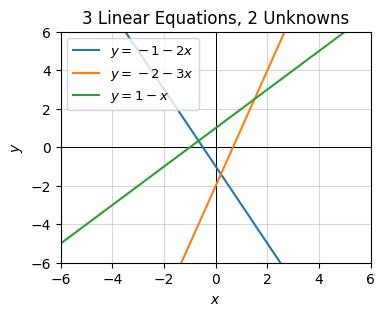

In [21]:
#| fig-align: center
x = np.linspace(-10, 10, 100)
f0 = lambda x: -1 - 2 * x
f1 = lambda x: -2 + 3 * x
f2 = lambda x: 1 + x
plot_function(x, [f0, f1, f2], xlim=(-6, 6), ylim=(-6, 6), 
              title='3 Linear Equations, 2 Unknowns',
              labels=[f'$y=-1-2x$', f'$y=-2-3x$', f'$y=1-x$'], 
              legend_fontsize=9.5, legend_loc='upper left')

From the plot, we can see that the three lines don't all intersect at the same point, which means there's no single solution that satisfies this particular system. In fact, this is general. It's *very* unlikely that more than two lines will intersect at the same point, or more than three planes will intersect at the same point, etc. 

So what do we do? If we can't find an *exact* solution, can we at least find an *approximately good* solution? Yes we can. Let's look at the situation abstractly for a minute. Suppose $\mathbf{A}\mathbf{x} = \mathbf{b}$ describes the over-determined example given above. Then $\mathbf{A}$ is a $3 \times 2$ matrix. We can't invert it, nor can we take its determinant. But we can find a way "squarify it" somehow. To do that, I'll need to introduce the *transpose* operation.

If $\mathbf{A}$ is some $m \times n$ matrix, either square or rectangular, we can swap its rows and columns to get an $n \times m$ matrix that's somehow related to $\mathbf{A}$. This swapped matrix is called the **transpose** of $\mathbf{A}$. It's usually denoted by the symbol $\mathbf{A}^\top$, read "A transpose". Formally, it's defined by

$$A_{i,j}^\top = A_{j,i}.$$

In the above example, we'd have

$$
\mathbf{A} = 
\begin{pmatrix}
2 & 1 \\
-3 & 1 \\
-1 & 1 \\
\end{pmatrix} \quad \Longrightarrow \quad
\mathbf{A}^\top = 
\begin{pmatrix}
2 & -3 & 1 \\
1 & 1 & 1 \\
\end{pmatrix}.
$$

All I did was swap the rows and columns. That's all the transpose operation is doing. Since $\mathbf{A}$ in this example is $3 \times 2$, $\mathbf{A}^\top$ must be $2 \times 3$. 

The transpose gives us an interesting and sensible way to "squarify" a matrix. Consider what happens when we left multiply an $m \times n$ matrix $\mathbf{A}$ by its transpose. Evidently the product $\mathbf{A}^\top \mathbf{A}$ would have to be an $n \times n$ matrix. That is, it's square. In the above example, we'd get the $2 \times 2$ matrix

$$
\mathbf{A}^\top \mathbf{A} = 
\begin{pmatrix}
14 & -2 \\
-2 & 3 \\
\end{pmatrix}.
$$

Here's what this looks like in numpy. We can get the transpose of a matrix `A` by using either the method `A.T` or the function `np.transpose(A)`.

In [22]:
A = np.array([
    [2, 1], 
    [-3, 1], 
    [-1, 1]])
At = A.T
AtA = At @ A
print(f'A = \n{A}')
print(f'A.T = \n{At}')
print(f'A.T A = \n{AtA}')

A = 
[[ 2  1]
 [-3  1]
 [-1  1]]
A.T = 
[[ 2 -3 -1]
 [ 1  1  1]]
A.T A = 
[[14 -2]
 [-2  3]]


Now, let's go back to the over-determined system $\mathbf{A}\mathbf{x} = \mathbf{b}$. If we left-multiply both sides by $\mathbf{A}^\top$, we'd get

$$\mathbf{A}^\top \mathbf{A}\mathbf{x} = \mathbf{A}^\top \mathbf{b}.$$

Most of the time, the square matrix $\mathbf{A}^\top \mathbf{A}$ will be invertible. Provided that's the case, we can write

$$\mathbf{x} \approx (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top \mathbf{b}.$$

I use approximately equals here because this won't usually give the *exact* solution to $\mathbf{A}\mathbf{x} = \mathbf{b}$. But it does give in some sense the best approximate solution you can get. For reasons I won't go into much right this moment, this kind of approximate solution is called the **least squares solution** to the linear system. It's the solution that minimizes the weird looking term $(\mathbf{A}\mathbf{x} - \mathbf{b})^\top (\mathbf{A}\mathbf{x} - \mathbf{b})$, whatever that means.

In numpy, we can't use `np.linalg.solve(A, b)` when a linear system isn't square. If we want to find the least squares solution, we'll need to use the function `np.linalg.lstsq(A, b)` instead. This function actually returns a lot more stuff than just the `x` we seek. For now I'll ignore those other objects and show you what the least squares solution to the above $3 \times 2$ system looks like. Evidently, it's

$$
\mathbf{x} \approx 
\begin{pmatrix}
0.136 \\
-0.578 \\
\end{pmatrix}.
$$

If you go back to the previous plot, you'll see this point seems to lie close to the point where the blue and orange lines intersect. That's interesting.

In [23]:
b = np.array([[-1], [-2], [1]])
x, _, _, _ = np.linalg.lstsq(A, b)
print(f'x ≈ \n{x}')

x ≈ 
[[ 0.13157895]
 [-0.57894737]]


Let's look again at the least squares solution $\mathbf{x} \approx (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top \mathbf{b}$. Notice that the matrix $(\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top$ seems to function kind of like $\mathbf{A}^{-1}$, if it existed. For this reason, it's called the **pseudoinverse** of $\mathbf{A}$, usually denoted by the special symbol $\mathbf{A}^+$. The pseudoinverse is in some sense the closest we can get to inverting the matrix of an over-determined system. Evidently, it satisfies the property that it's a *left* inverse of $\mathbf{A}$,

$$\mathbf{A}^+ \mathbf{A} = \mathbf{I}.$$

#### Under-Determined Systems

I'll come back to this more later. Let's briefly take a look at the other type of rectangular system, the *over-determined* system where $m < n$. In this case there are too many unknowns and not enough equations. As an example, consider the following $2 \times 3$ linear system,

\begin{gather*}
\begin{alignedat}{3}
   x_0 & {}+{} &  x_1 & {}+{} & x_2 {}={} & 2  \\
   x_0 & {}-{} &  x_1 & {}+{} & x_2 {}={} & 0 \\
\end{alignedat}
\quad \Longrightarrow \quad
\begin{pmatrix}
1 & 1 & 1 \\
1 & -1 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1 \\
x_2 \\
\end{pmatrix} = 
\begin{pmatrix}
2 \\
0 \\
\end{pmatrix}.
\end{gather*}

Graphically, this system will look like two planes in 3D space,

\begin{align*}
z &= 2 - x - y, \\
z &= -x + y. \\
\end{align*}

Since there are two planes, they'll intersect not at a point, but at a line. Any point on this line will be a solution to the linear system.

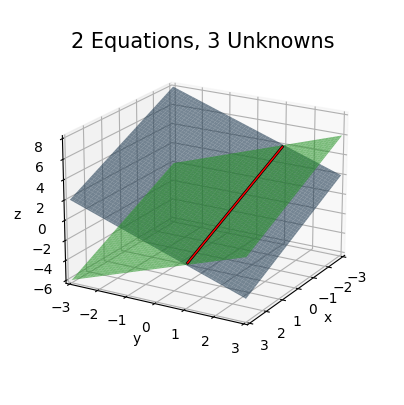

In [24]:
#| fig-align: center
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
t = np.linspace(-1.9, 3.9, 100)
f1 = lambda x, y: 2 - x - y
f2 = lambda x, y: y - x
plot_function_3d(x, y, [f1, f2], azim=30, elev=20, ticks_every=[1, 1, 2], figsize=(5, 5), zorders=[0, 1], dist=12,
        colors=['steelblue', 'limegreen'], alpha=0.6, titlepad=-5, labelpad=2, title='2 Equations, 3 Unknowns',
        lines=[[1 - t, np.full(len(t), 1), t]])

To see why this system has infinitely many solutions, let's try to solve it. It's easy enough using substitution. The second equation says $x_1 = x_0 + x_2$. Plugging this into the first equation then says $x_2 = 1 - x_0$. There's no way to solve for $x_0$ because we don't have enough equations. We thus have to conclude that the solutions to this system look like

$$x_0 = x_0, \quad x_1 = 1, \quad x_2 = 1 - x_0.$$

Any choice of $x_0$ will satisfy this linear system, which means it'll have infinitely many solutions, which are of course just the points on the line above.

In general, we can almost exactly the same trick to "solve" these linear systems as we did with the over-determined systems. This time, instead of multiplying $\mathbf{A}$ on the *left* by $\mathbf{A}^\top$, we'll instead multiply on the *right* by $\mathbf{A}^\top$,

$$\mathbf{A}\mathbf{A}^\top \mathbf{x} = \mathbf{A}^\top \mathbf{b}.$$

Provided we can invert $\mathbf{A}\mathbf{A}^\top$, and usually we can, we'll get a solution of the form

$$\mathbf{x} = (\mathbf{A}\mathbf{A}^\top)^{-1} \mathbf{A}^\top \mathbf{b}.$$

Note that this gives only *one* of the infinitely many possible solutions to an under-determined linear system. For reasons I won't go into now, it turns out the solution it gives is called the **least norm** solution. In a sense, this means it gives you the "smallest" vector $\mathbf{x}$ that satisfies $\mathbf{A}\mathbf{x} = \mathbf{b}$. By smallest, I mean it's the vector such that the $1 \times 1$ matrix $\mathbf{x}^\top \mathbf{x}$ is minimized.

It turns out the matrix $(\mathbf{A}\mathbf{A}^\top)^{-1} \mathbf{A}^\top$ on the right is *also* a pseudoinverse. It satisfies the property that it's a *right* inverse of $\mathbf{A}$, in the sense that

$$\mathbf{A} \mathbf{A}^+ = \mathbf{I}.$$

In fact, there are many different kinds of pseudoinverses. The two I covered here are the most practical ones.

In numpy, you can solve an under-determined system by using the same `np.linalg.lstsq(A, b)` function from before. It's able to tell which case you want by looking at the shape of the `A` you pass in. Here's the least norm solution for the above example,

$$
\mathbf{x} = 
\begin{pmatrix}
\frac{1}{2} \\
1 \\
\frac{1}{2} \\
\end{pmatrix}.
$$

You can check it satisfies the linear system with the choice of $x_0 = \frac{1}{2}$.

In [25]:
A = np.array([
    [1, 1, 1], 
    [1, -1, 1]])
b = np.array([[2], [0]])
x, _, _, _ = np.linalg.lstsq(A, b)
print(f'x ≈ \n{x}')

x ≈ 
[[0.5]
 [1. ]
 [0.5]]


I'll come back to this stuff more in later lessons and fill in some of these missing pieces. I just want to close by mentioning that I've essentially just derived much of the ideas behind linear regression in this section. In fact, training a linear regression model is completely equivalent to finding either a least squares solution or a least norm solution to $\mathbf{A}\mathbf{x} = \mathbf{b}$. In that case, $\mathbf{A}$ represents the matrix of data, $\mathbf{x}$ represents the parameters the model needs to learn, and $\mathbf{b}$ represents the target values. Using what I've covered in this lesson, you could completely solve any linear regression problem you wanted from scratch just by using something like `x = np.linalg.lstsq(A, b)`.